In [104]:
from math import sqrt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from sklearn.feature_selection import RFE

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#need to clean this up

In [2]:
#reading in data and examining

df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


# Null values check, null values in 'waterfront', 'view' and 'yr_renovated' features, objects in date and sqft_basement

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.shape

(21597, 21)

In [6]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

# View is predominately zero, meaning lacking a view, dropping

In [9]:
df['view'].value_counts(dropna=False)

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

In [10]:
df.drop('view', axis=1, inplace=True)

In [11]:
df['waterfront'].value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

# Dropping 'waterfront' due to majority of data being 0.0 or NaN

In [12]:
df.drop('waterfront', axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
df['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2005.0       29
2000.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2001.0       15
2008.0       15
2010.0       15
1983.0       15
2015.0       14
1986.0       14
1987.0       14
1994.0       14
1985.0       14
1992.0       13
1995.0       12
1997.0       12
          ...  
1964.0        5
1975.0        5
1973.0        4
1981.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1946.0        1
1959.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Leng

# what to do about the zeroes and nulls here? for now drop it as 0s would compromise analysis.

In [15]:
df.drop('yr_renovated', axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


# Dropping id as it provides no real analysis driving information

In [16]:
df.drop('id', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


# Date dropped, to be revisited for time series analysis

In [17]:
df.drop('date', axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [18]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [19]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
295.0         1
2580.0        1
2720.0        1
556.0         1
1245.0        1
172.0         1
2570.0        1
176.0         1
2810.0        1
784.0         1
946.0         1
862.0         1
588.0         1
2500.0        1
935.0         1
65.0          1
1281.0        1
506.0         1
792.0         1
1798.0        1
2196.0        1
518.0         1
508.0         1
1548.0        1
666.0         1
1135.0        1
225.0         1
1275.0        1
1816.0        1
248.0         1
Name: sqft_basement, Len

# Dropping 'sqft_basement' as it is mostly 0s, houses not having basements

In [20]:
df = df.drop('sqft_basement', axis=1)

df = df.drop('sqft_basement', axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(10)
memory usage: 2.5 MB


# TBD: GEOGRAPHIC PLOTTING TO GO HERE OF TOP 25% PRICE LOCATIONS

# Zipcode, lat and long are mostly useful for geospatial analysis, dropping them for now 

In [22]:
df.drop(['zipcode', 'lat', 'long'], axis=1, inplace=True)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,1800,7503


# LOG TRANSFORM HERE

In [23]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(variable)
    
    plt.tight_layout()
    plt.show()

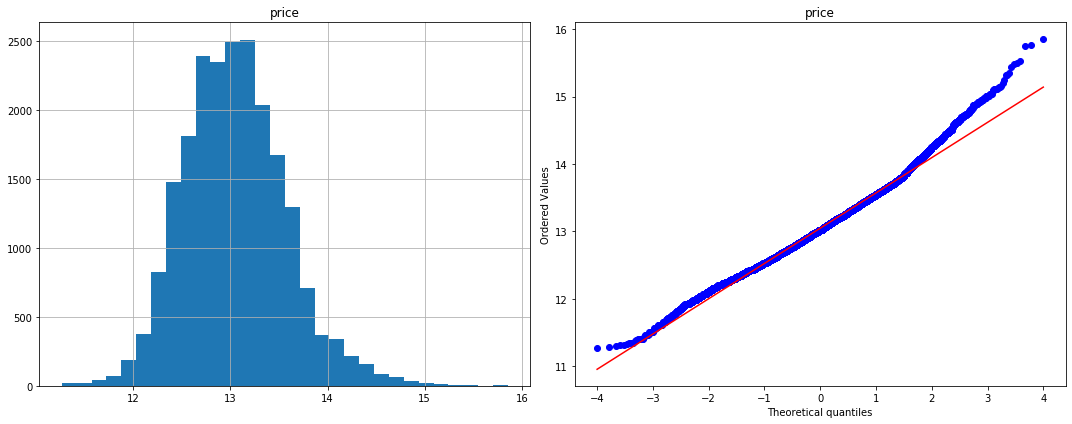

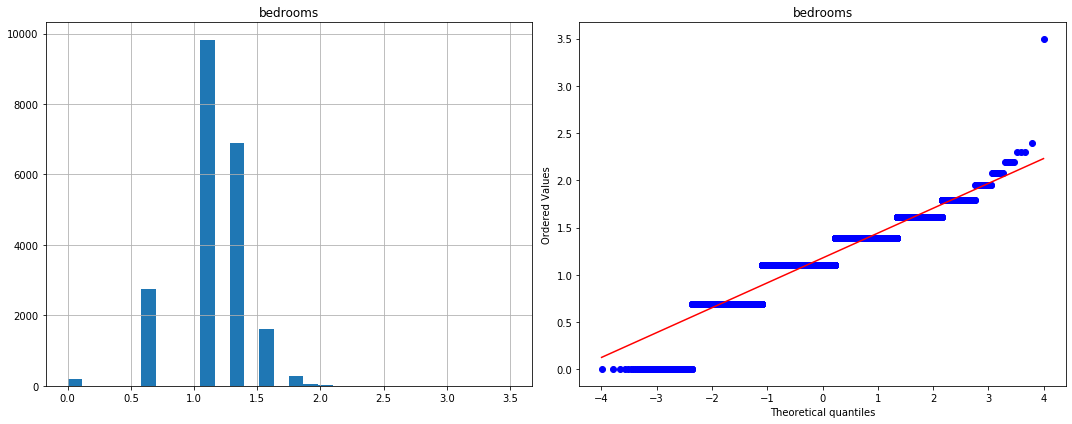

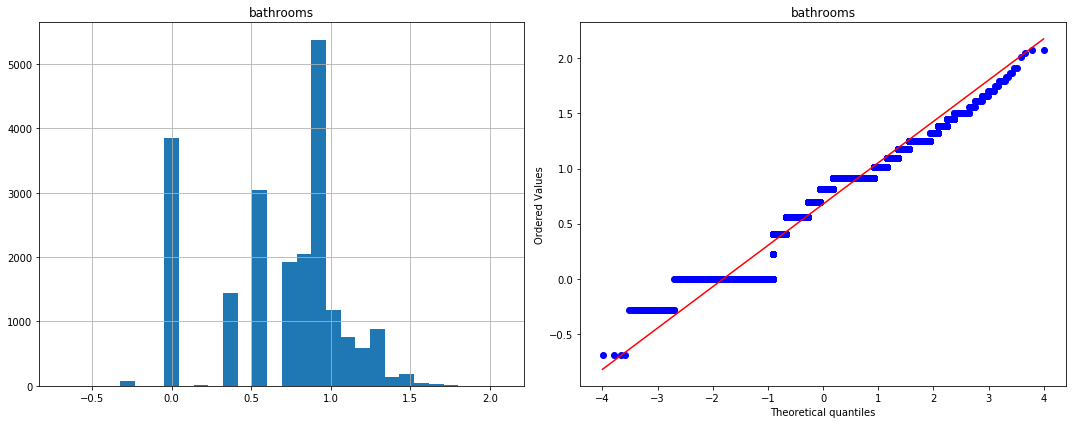

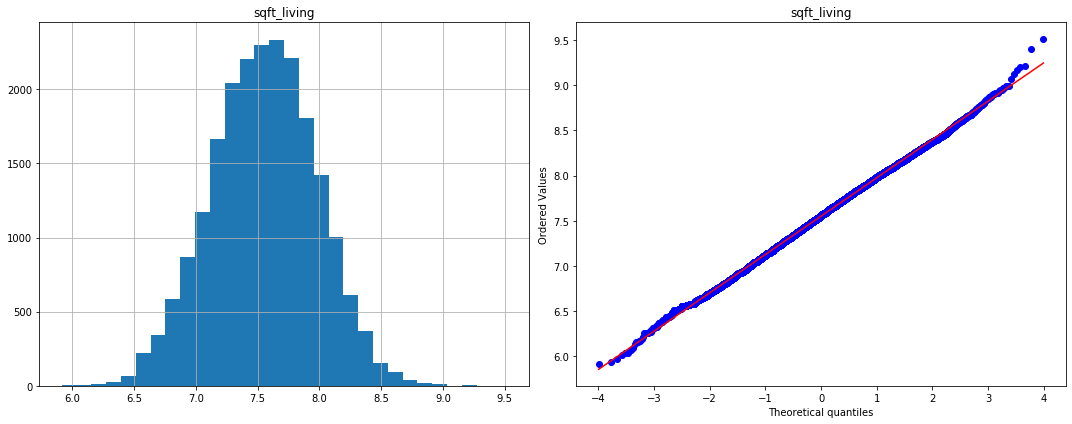

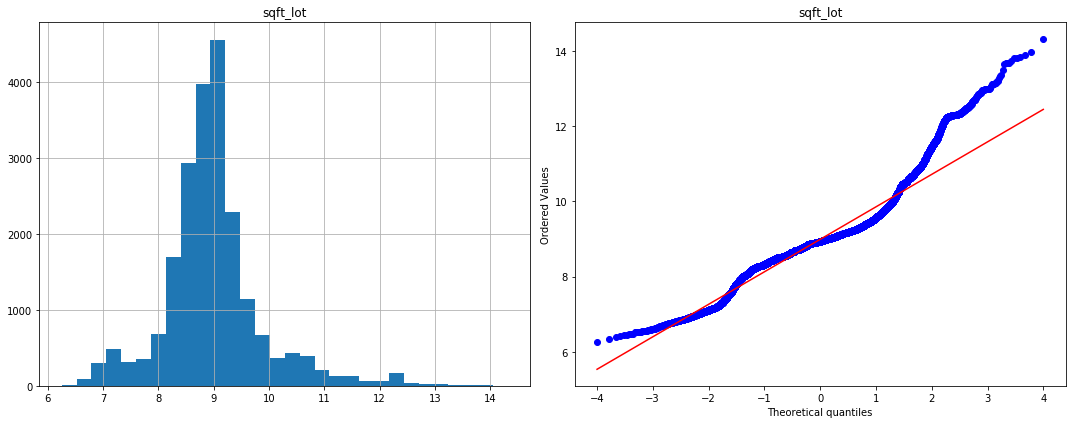

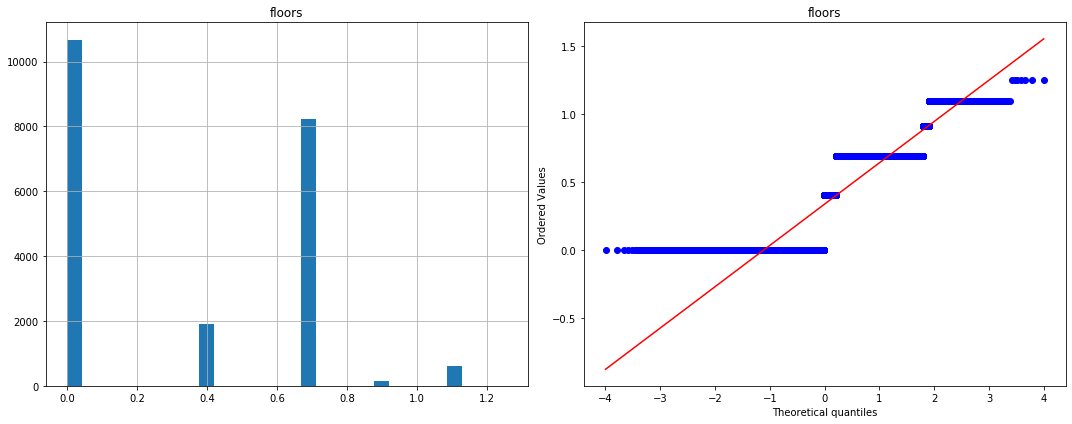

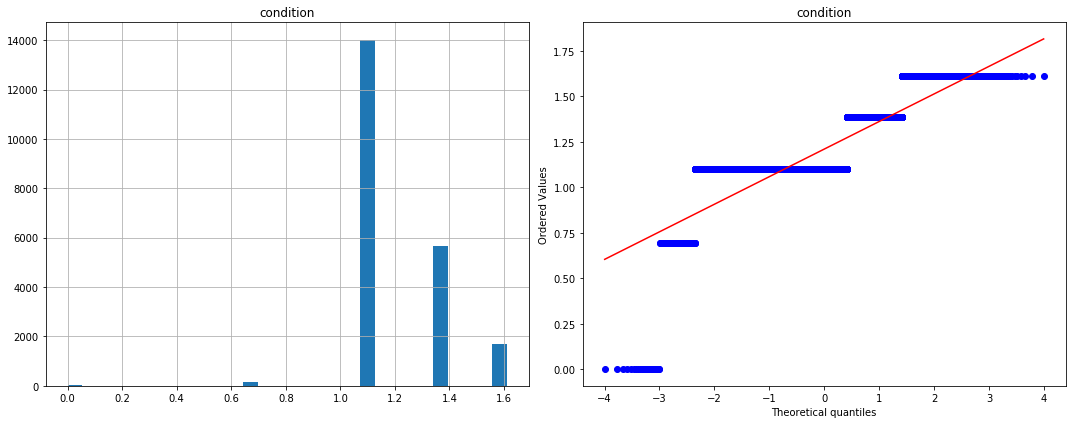

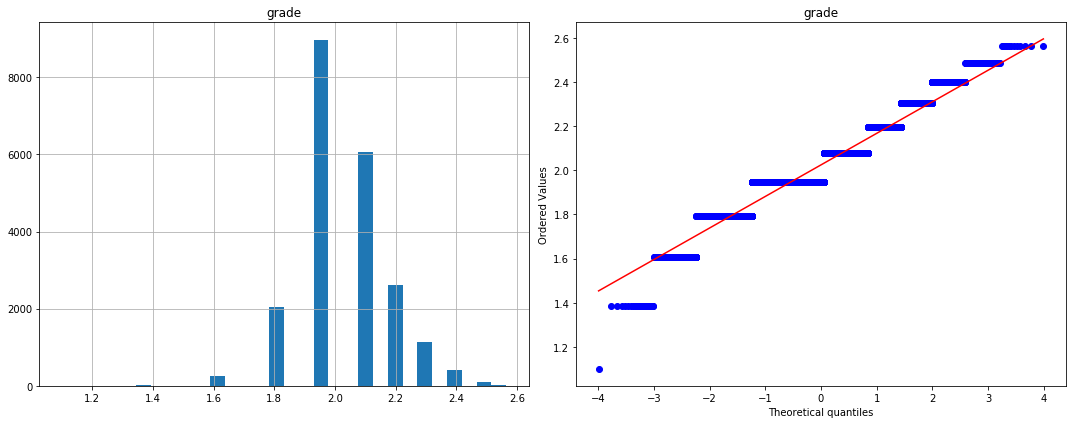

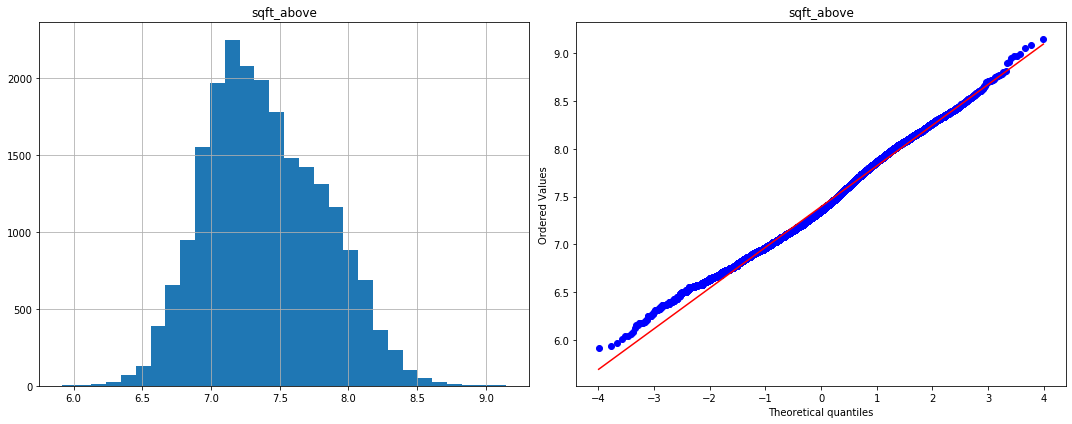

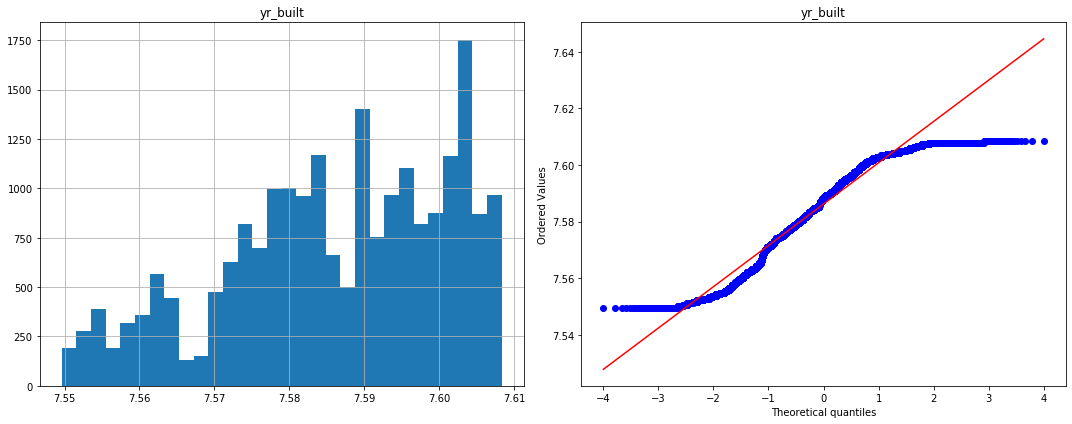

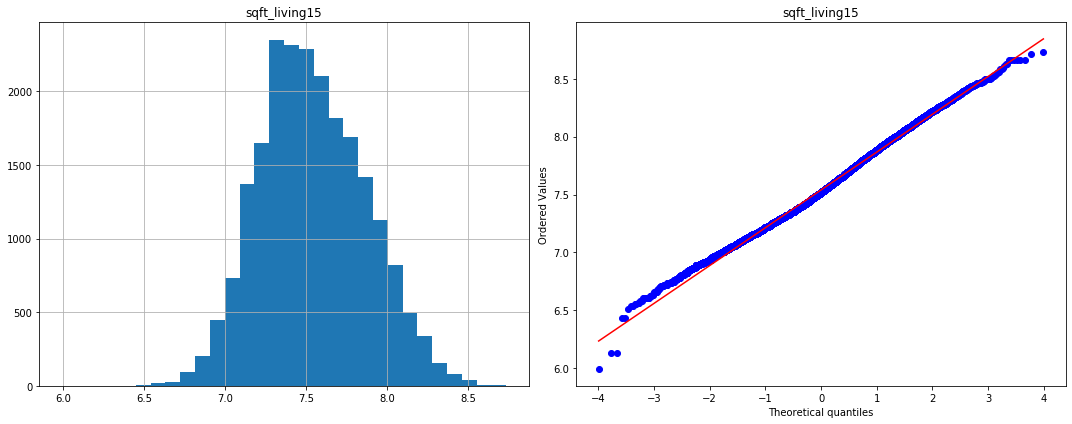

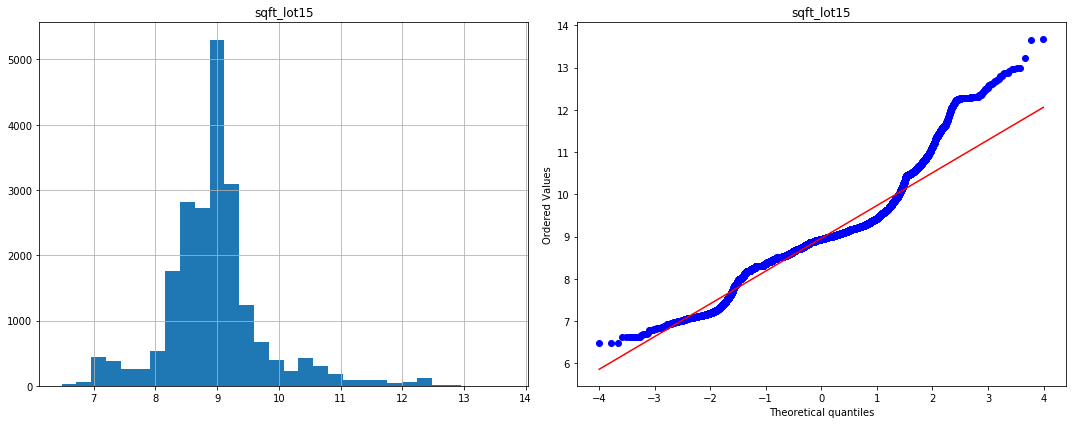

In [24]:
#view has 0 values, lat and long don't make sense to transform?
for col in df.columns:
    df[col] = np.log(df[col])
    diagnostic_plots(df,col)

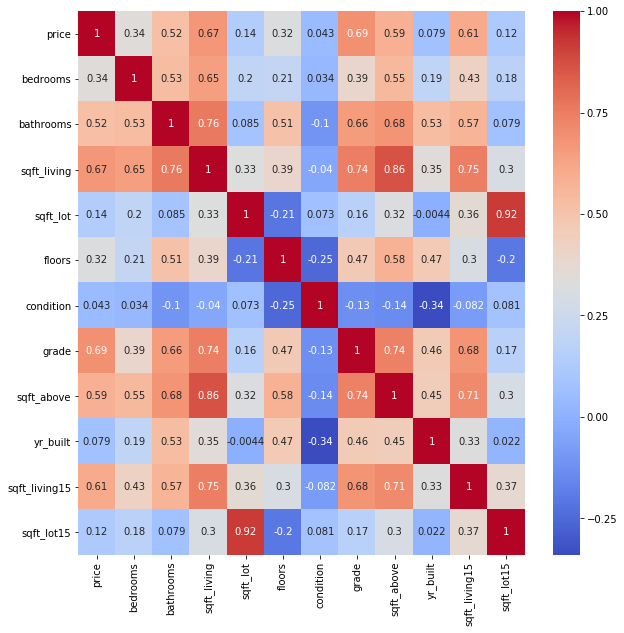

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [26]:
df.drop(['sqft_living15', 'sqft_lot15','sqft_above'], axis=1,inplace=True)

In [27]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,1.098612,1.945910,7.578145
1,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,1.098612,1.945910,7.576097
2,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,1.098612,1.791759,7.566828
3,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,1.609438,1.945910,7.583248
4,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,1.098612,2.079442,7.594381


# EDIT TEXT WITH SUMMARY HERE

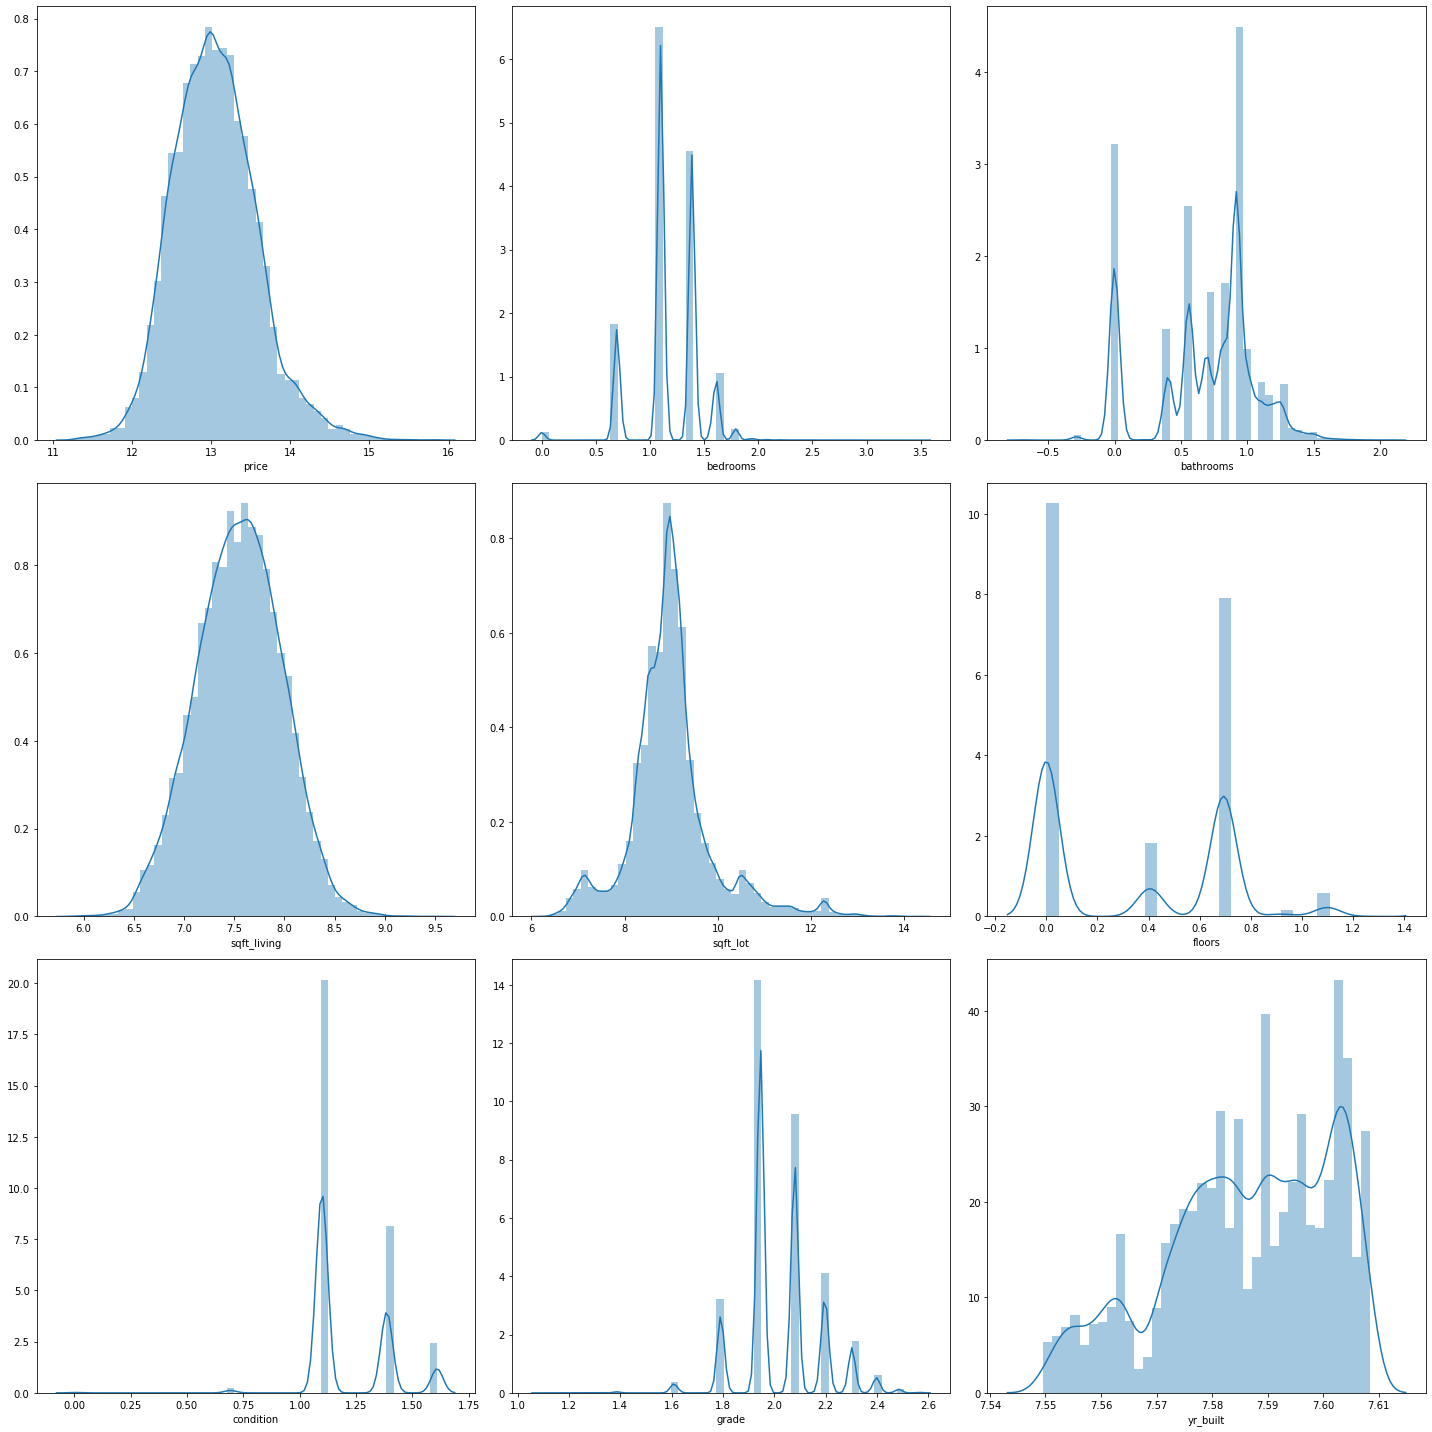

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//3,i%3])
    
plt.tight_layout()
plt.show()

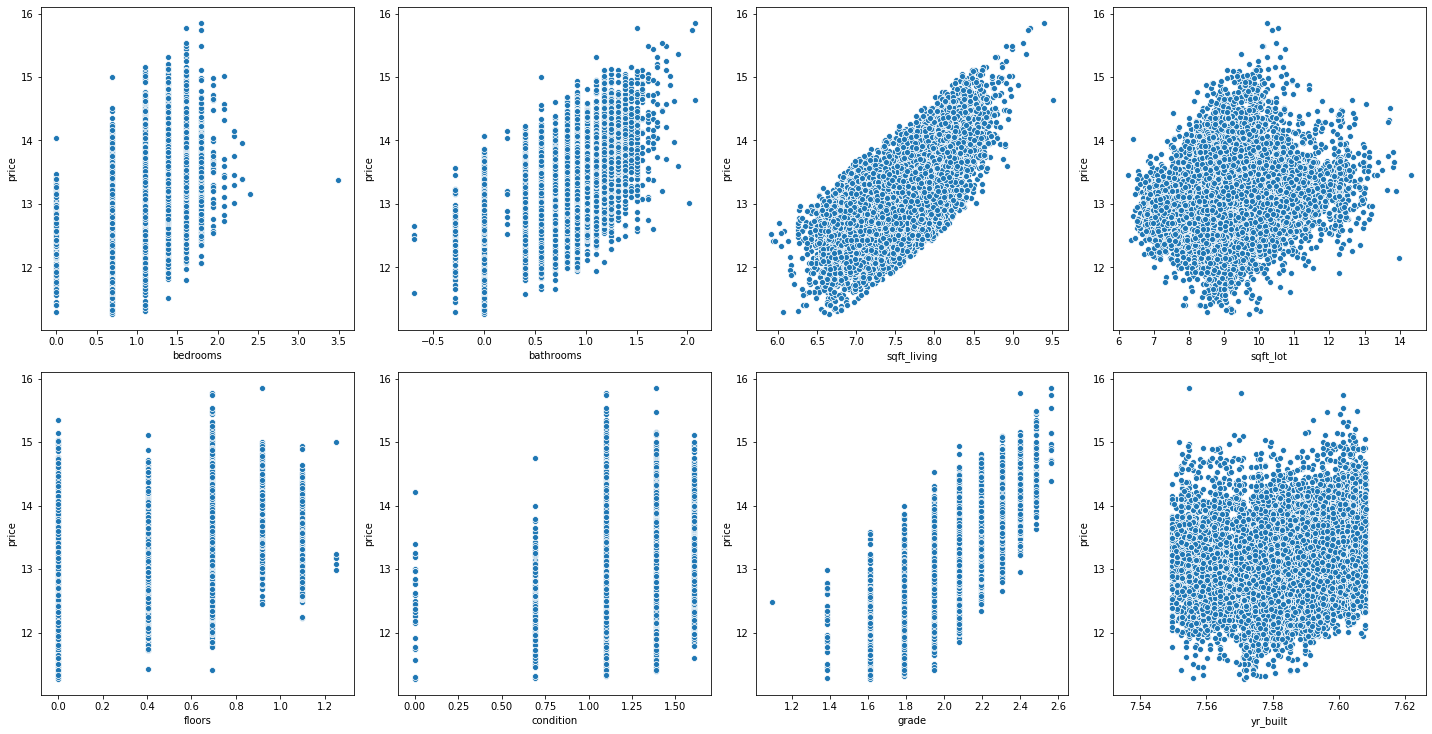

In [29]:
#set figures large to be modified by tight_layout
plt.figure(1, figsize=(20,20))

#core function to create regplot(regression line fitted over scatterplot)
def multi_scatter_plot(x):
    #sns.regplot(df[x], df['price'])
    sns.scatterplot(x, y="price", data=df)
    
#iterating over dataframe minus redundant price column, adding subplots
for index, col in enumerate(df.drop(['price'], axis=1).columns, start=1):
    #adds subplot, using index to increment position of new subplot in a 5 column structure
    plt.subplot(4, 4,index)
    #call function to create plot
    multi_scatter_plot(col)
    
#tidy display for inline and show plot
plt.tight_layout()
plt.show()

# Bedroom, floors, condition, grade are mostly at least ordinal?

# Handling outliers via. trimming engineering
# Worth checking all features for outliers

In [30]:
z = np.abs(stats.zscore(df))
print(z)

[[1.40203049 0.27972451 1.72654877 ... 0.61337387 0.52594349 0.5374211 ]
 [0.27994485 0.27972451 0.33966073 ... 0.61337387 0.52594349 0.67434111]
 [1.79947215 1.71165055 1.72654877 ... 0.61337387 1.55814483 1.29397536]
 ...
 [0.27301182 1.71165055 2.45954826 ... 0.61337387 0.52594349 1.28406559]
 [0.28296116 0.27972451 0.60811403 ... 0.61337387 0.36818998 1.11747898]
 [0.67730599 1.71165055 2.45954826 ... 0.61337387 0.52594349 1.25078146]]


In [31]:
len(df)

21597

In [32]:
df = df[(z < 3).all(axis=1)]

len(df)

20741

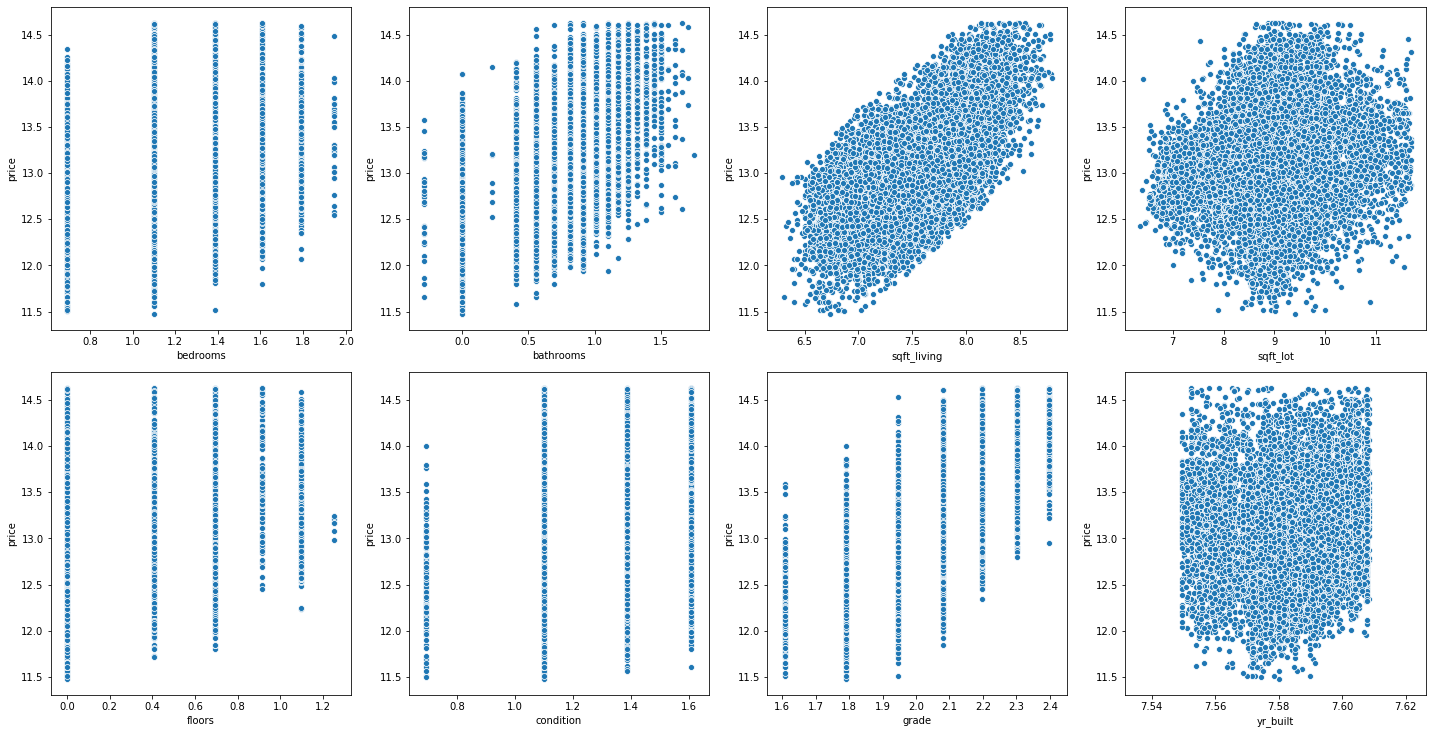

In [33]:
#set figures large to be modified by tight_layout
plt.figure(1, figsize=(20,20))
    
#iterating over dataframe minus redundant price column, adding subplots
for index, col in enumerate(df.drop(['price'], axis=1).columns, start=1):
    #adds subplot, using index to increment position of new subplot in a 5 column structure
    plt.subplot(4, 4,index)
    #call function to create plot
    multi_scatter_plot(col)
    
#tidy display for inline and show plot
plt.tight_layout()
plt.show()

# Distribution of discrete features - violin plots - TBD: More descriptive plot

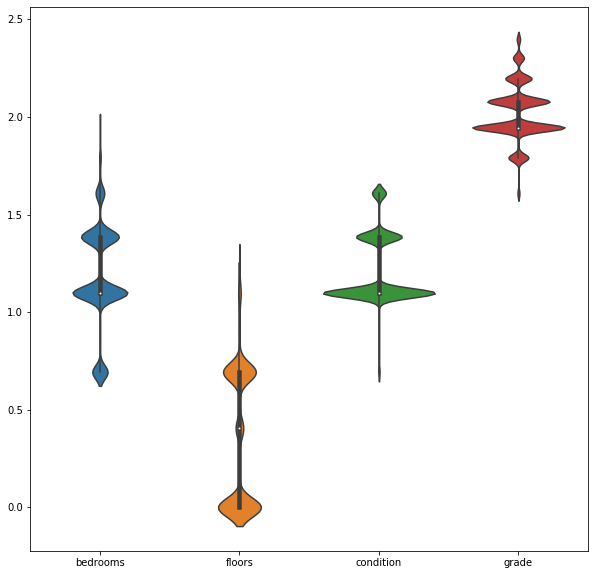

In [34]:
cat_feat = df[['bedrooms','floors','condition','grade']]
plt.figure(figsize=(10,10))
sns.violinplot(data=cat_feat)

# Making the decision to keep the order of the ordinal variables instead of encoding as per categorical encoding strategies as it is meaningful order

# MODELING

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1),
                                                    df['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((14518, 8), (6223, 8))

In [36]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built'],
      dtype='object')

In [37]:
X = X_train
Y = y_train
 
# with sklearn, multiple linear regression fitting!
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 94.98888885473204
Coefficients: 
 [ -0.18946285   0.09739927   0.52279191  -0.06697823   0.05780679
   0.14513761   1.83516505 -11.73831235]


In [38]:
#make predictions
y_train_pred = regr.predict(X)

In [39]:
X_train_preds = regr.predict(X)
X_test_preds = regr.predict(X_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']] )

In [40]:
X_train_preds

array([13.00422309, 13.25358972, 13.86921763, ..., 12.83339381,
       13.8110159 , 13.28024076])

# R2 score for training predictions

In [41]:
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()

train r2: 0.6102457587759202



# Visualizing regression predictions vs. actual - look into negative predictions, shouldn't occur

Text(0, 0.5, 'Predicted Price')

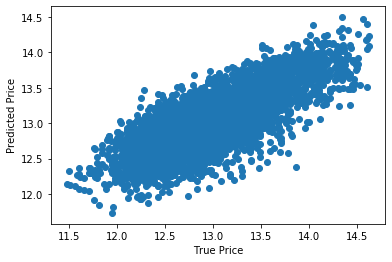

In [42]:
plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

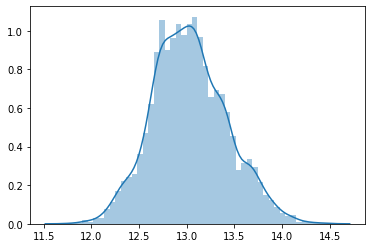

In [43]:
sns.distplot(X_test_preds)

# Modeling with Ordinary Least Squares with SM for better stats analysis of regression

In [44]:
X = sm.add_constant(X)

#fit model, needed Y to be coerced to list for shape
model_fit = sm.OLS(list(Y), X).fit()

#store results in dataframe for easier analysis
results_df = pd.concat([X, Y], axis=1)

model_fit.summary()

/Users/michael/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2840.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:51:35   Log-Likelihood:                -3570.7
No. Observations:               14518   AIC:                             7159.
Df Residuals:                   14509   BIC:                             7228.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          94.9889      1.745     54.423      0.000      91.568      98.410
bedrooms       -0.1895      0.013    -14.201      0.000      -0.216      -0.163
bathrooms       0.0974      0.012      8.172      0.000       0.074       0.121
sqft_living     0.5228      0.014     38.626      0.000       0.496       0.549
sqft_lot       -0.0670      0.004    -16.980      0.000      -0.075      -0.059
floors          0.0578      0.010      5.913      0.000       0.039       0.077
condition       0.1451      0.016      9.022      0.000       0.114       0.177
grade           1.8352      0.029     63.141      0.000       1.778       1.892
yr_built      -11.7383      0.229    -51.260      0.000     -12.187     -11.289
==============================================================================
Omnibus:                       43.251   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.799
Skew:                          -0.024   Prob(JB):                     7.65e-13
Kurtosis:                       3.300   Cond. No.                     9.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Inverse scale, reverse log, to examine coef
# Scaling not required, gives info on importance moreso than being a requirement
# Include more variables, maybe keep at lower thresholds of corr
# Residual plotting

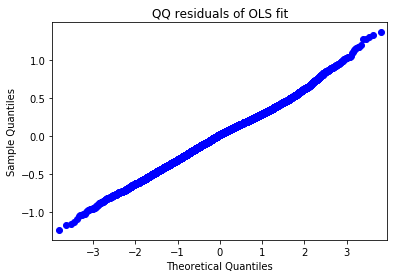

In [45]:
res = model_fit.resid # residuals
probplot = sm.ProbPlot(res)
fig = probplot.qqplot()
h = plt.title('QQ residuals of OLS fit')
plt.show()

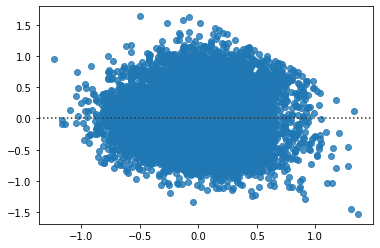

In [46]:
sns.residplot(model_fit.resid, model_fit.fittedvalues)

# Are the coeffs, slopes, intercepts in appropriate units?" - don't think so?
# Questions: 
# 1. Why are there negative predictions and so many?
# 2. How to read the coefficients?
# Moving forward:
# RMSE?
# Try more models and iterate on model

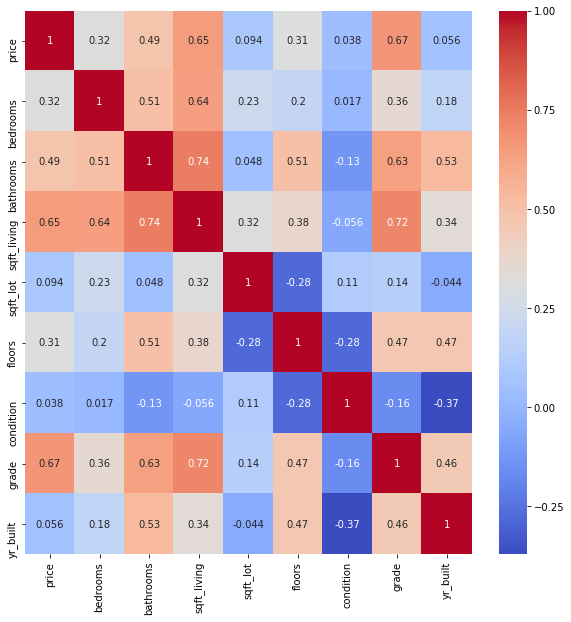

In [47]:
# Examining multicolinearity 

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [48]:
dfit1 = df.drop('sqft_living', axis=1)

In [49]:
dfit1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20741 entries, 0 to 21596
Data columns (total 8 columns):
price        20741 non-null float64
bedrooms     20741 non-null float64
bathrooms    20741 non-null float64
sqft_lot     20741 non-null float64
floors       20741 non-null float64
condition    20741 non-null float64
grade        20741 non-null float64
yr_built     20741 non-null float64
dtypes: float64(8)
memory usage: 1.4 MB


In [50]:
X_train, X_test, y_train, y_test = train_test_split(dfit1.drop('price', axis=1),
                                                    dfit1['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((14518, 7), (6223, 7))

In [51]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade',
       'yr_built'],
      dtype='object')

In [52]:
X_train = sm.add_constant(X_train)

#fit model, needed Y to be coerced to list for shape
model_fit = sm.OLS(y_train, X_train).fit()

#store results in dataframe for easier analysis
results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     2750.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:51:39   Log-Likelihood:                -4281.2
No. Observations:               14518   AIC:                             8578.
Df Residuals:                   14510   BIC:                             8639.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.9924      1.793     60.792      0.000     105.478     112.507
bedrooms       0.0261      0.013      2.050      0.040       0.001       0.051
bathrooms      0.3102      0.011     27.946      0.000       0.288       0.332
sqft_lot      -0.0140      0.004     -3.613      0.000      -0.022      -0.006
floors         0.0961      0.010      9.411      0.000       0.076       0.116
condition      0.1507      0.017      8.920      0.000       0.118       0.184
grade          2.3922      0.026     90.278      0.000       2.340       2.444
yr_built     -13.3303      0.237    -56.354      0.000     -13.794     -12.867
==============================================================================
Omnibus:                       50.663   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.842
Skew:                          -0.000   Prob(JB):                     1.85e-15
Kurtosis:                       3.335   Cond. No.                     8.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
dfit2 = df.drop('condition', axis=1)

X_train, X_test, y_train, y_test = train_test_split(dfit2.drop('price', axis=1),
                                                    dfit2['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

#fit model, needed Y to be coerced to list for shape
model_fit = sm.OLS(y_train, X_train).fit()

#store results in dataframe for easier analysis
results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     3216.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:51:39   Log-Likelihood:                -3611.3
No. Observations:               14518   AIC:                             7239.
Df Residuals:                   14510   BIC:                             7299.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          99.7936      1.667     59.873      0.000      96.527     103.061
bedrooms       -0.1862      0.013    -13.920      0.000      -0.212      -0.160
bathrooms       0.1072      0.012      9.011      0.000       0.084       0.131
sqft_living     0.5239      0.014     38.601      0.000       0.497       0.550
sqft_lot       -0.0658      0.004    -16.641      0.000      -0.074      -0.058
floors          0.0459      0.010      4.723      0.000       0.027       0.065
grade           1.8277      0.029     62.736      0.000       1.771       1.885
yr_built      -12.3498      0.219    -56.305      0.000     -12.780     -11.920
==============================================================================
Omnibus:                       44.618   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.420
Skew:                          -0.030   Prob(JB):                     3.40e-13
Kurtosis:                       3.302   Cond. No.                     9.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:

X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1),
                                                    df['price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train = sm.add_constant(X_train)

#fit model, needed Y to be coerced to list for shape
model_fit = sm.OLS(y_train, X_train).fit()

#store results in dataframe for easier analysis
results_df = pd.concat([X_train, y_train], axis=1)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2840.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:51:39   Log-Likelihood:                -3570.7
No. Observations:               14518   AIC:                             7159.
Df Residuals:                   14509   BIC:                             7228.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          94.9889      1.745     54.423      0.000      91.568      98.410
bedrooms       -0.1895      0.013    -14.201      0.000      -0.216      -0.163
bathrooms       0.0974      0.012      8.172      0.000       0.074       0.121
sqft_living     0.5228      0.014     38.626      0.000       0.496       0.549
sqft_lot       -0.0670      0.004    -16.980      0.000      -0.075      -0.059
floors          0.0578      0.010      5.913      0.000       0.039       0.077
condition       0.1451      0.016      9.022      0.000       0.114       0.177
grade           1.8352      0.029     63.141      0.000       1.778       1.892
yr_built      -11.7383      0.229    -51.260      0.000     -12.187     -11.289
==============================================================================
Omnibus:                       43.251   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.799
Skew:                          -0.024   Prob(JB):                     7.65e-13
Kurtosis:                       3.300   Cond. No.                     9.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built'],
      dtype='object')

In [64]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred = regressor.predict(X_test)

In [69]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df6 = df.head(25)

In [70]:
y_pred = regressor.predict(X_test)

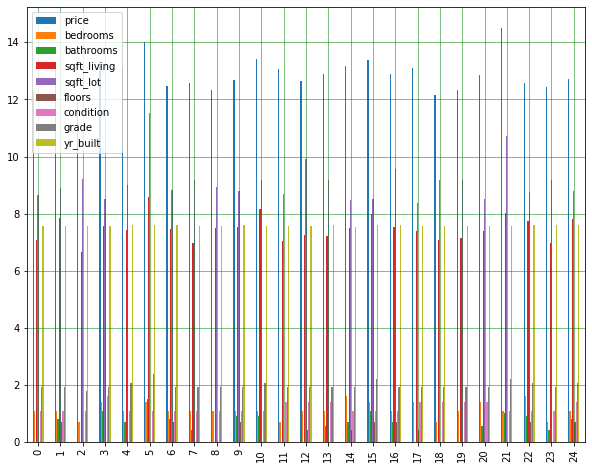

In [71]:
df6.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24462182028143434
Mean Squared Error: 0.09636905776825623
Root Mean Squared Error: 0.3104336608170194


In [91]:
# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=regressor, step=1, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
rfecv.fit(X, y)

# Recursive feature elimination
rfecv.transform(X)

/Users/michael/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([[ 1.09861229,  0.        ,  7.07326972, ...,  1.09861229,
         1.94591015,  7.57814547],
       [ 1.09861229,  0.81093022,  7.85166118, ...,  1.09861229,
         1.94591015,  7.57609734],
       [ 0.69314718,  0.        ,  6.64639051, ...,  1.09861229,
         1.79175947,  7.56682848],
       ...,
       [ 0.69314718, -0.28768207,  6.92755791, ...,  1.09861229,
         1.94591015,  7.60539236],
       [ 1.09861229,  0.91629073,  7.37775891, ...,  1.09861229,
         2.07944154,  7.60290046],
       [ 0.69314718, -0.28768207,  6.92755791, ...,  1.09861229,
         1.94591015,  7.60489448]])

In [92]:
rfecv.n_features_

8

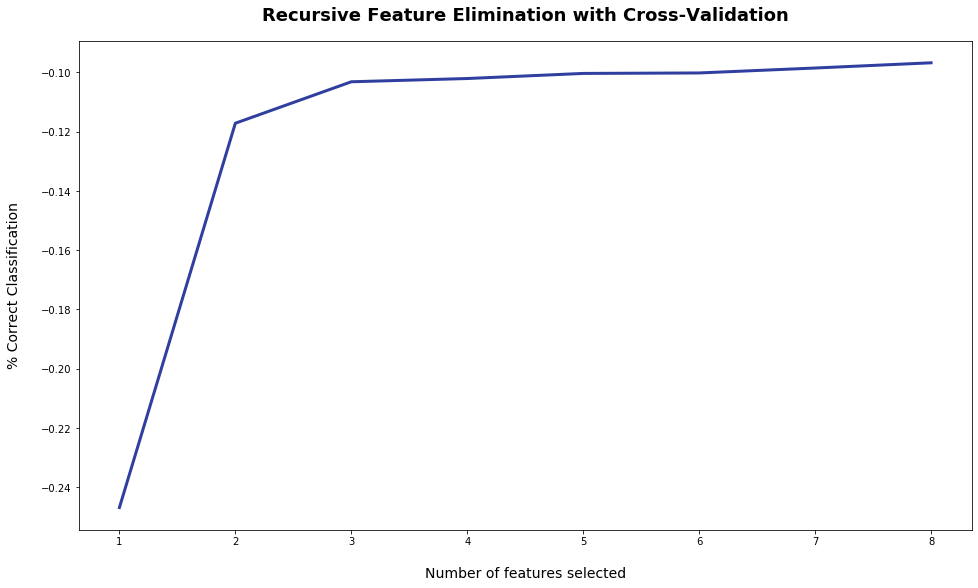

In [94]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [109]:
cv_5_results = np.mean(cross_val_score(regressor, X,y, cv=5, scoring='r2'))
cv_10_results = np.mean(cross_val_score(regressor, X,y, cv=10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(regressor, X,y, cv=20, scoring='r2'))

print('CV Results')
print(f"Folds = 5, score={cv_5_results}")
print(f"Folds = 10, score={cv_10_results}")
print(f"Folds = 20, score={cv_20_results}")

CV Results
Folds = 5, score=0.6065756842423543
Folds = 10, score=0.6059248643607018
Folds = 20, score=0.6066414276100398
